# Clean Data

In [138]:
import math
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
dataset = pd.read_csv('filteredRawData.csv')

stockList = dataset['Stock'].tolist()
dataset = dataset.set_index('Stock')

dataset

,Return on Assets,Return on Equity
Stock,,
3K-BAT,1.098000,1.452000
7UP,-2.379000,9.174000
A,2.493000,4.580000
A5,8.067001,21.728000
AAV,-8.644000,-58.974000
...,...,...
WR,-2.750000,-19.365999
YGG,9.396000,15.767999
YUASA,9.263000,19.083000


In [139]:
statSum = dataset.describe()
statSum.loc["+3 std"] = statSum.loc["mean"] + (statSum.loc["std"] * 3)
statSum.loc["-3 std"] = statSum.loc["mean"] - (statSum.loc["std"] * 3)

statSum

,Return on Assets,Return on Equity
count,709.000000,709.000000
mean,2.213630,1.799508
std,5.133625,38.698868
min,-55.487996,-898.549000
25%,0.128000,-0.426000
50%,2.321000,5.615000
75%,4.484000,11.525000
max,17.657000,29.939000
+3 std,17.614505,117.896112
-3 std,-13.187244,-114.297097


In [140]:
import pandas as pd
roa = dataset.iloc[:,0] > -40
roe = dataset.iloc[:,1] > - 30

data2 = {'ROA Filter': roa.tolist(),
        'ROE Filter': roe.tolist()}

filterData = pd.DataFrame(data2, columns = ['ROA Filter', 'ROE Filter'])
filterData.index = dataset.index

roaOutlier = filterData[filterData['ROA Filter'] == False]
roaOutlier = roaOutlier.drop(['ROE Filter'], axis=1)
roeOutlier = filterData[filterData['ROE Filter'] == False]
roeOutlier = roeOutlier.drop(['ROA Filter'], axis=1)

dataset = dataset[roa & roe]

In [141]:
statSum = dataset.describe()
statSum.loc["+3 std"] = statSum.loc["mean"] + (statSum.loc["std"] * 3)
statSum.loc["-3 std"] = statSum.loc["mean"] - (statSum.loc["std"] * 3)

statSum

,Return on Assets,Return on Equity
count,685.000000,685.000000
mean,2.655670,5.382064
std,4.062655,11.053433
min,-15.018000,-29.459998
25%,0.372000,0.361000
50%,2.449000,6.016000
75%,4.734000,11.802000
max,17.657000,29.939000
+3 std,14.843635,38.542364
-3 std,-9.532295,-27.778236


In [143]:
valueList = dataset.values.tolist()
dataset

,Return on Assets,Return on Equity
Stock,,
3K-BAT,1.098000,1.452000
7UP,-2.379000,9.174000
A,2.493000,4.580000
A5,8.067001,21.728000
ABICO,4.151000,4.751000
...,...,...
WR,-2.750000,-19.365999
YGG,9.396000,15.767999
YUASA,9.263000,19.083000


In [144]:
group1 = ['3K-BAT', '7UP', 'ABM', 'ACC', 'AFC', 'AH', 'AIRA', 'ALL', 'ALT', 'AMATAV', 'ANAN', 'AQUA', 'ARIP', 'ASAP', 'ASIA', 'AWC', 'AYUD', 'B', 'BAM', 'BANPU', 'BBL', 'BCP', 'BEC', 'BGT', 'BH', 'BIG', 'BJC', 'BJCHI', 'BKD', 'BLA', 'BLAND', 'BR', 'BTNC', 'BTW', 'BWG', 'CCET', 'CGH', 'CHEWA', 'CIMBT', 'CITY', 'CK', 'CKP', 'CM', 'CMAN', 'CMC', 'CMR', 'CNT', 'COMAN', 'CPH', 'CPL', 'CPNREIT', 'CPT', 'CRANE', 'CRC', 'CSR', 'D', 'DDD', 'DEMCO', 'DHOUSE', 'DV8', 'EASON', 'ECF', 'EE', 'EMC', 'ERWPF', 'F&D', 'FANCY', 'FN', 'FUTUREPF', 'FVC', 'GBX', 'GCAP', 'GEL', 'GENCO', 'GGC', 'GIFT', 'GJS', 'GLAND', 'GLOCON', 'GREEN', 'GSTEEL', 'GTB', 'GYT', 'ICC', 'IHL', 'IMH', 'IMPACT', 'IND', 'INGRS', 'INOX', 'INSURE', 'IT', 'ITD', 'JAK', 'JCK', 'JTS', 'KCM', 'KDH', 'KOOL', 'KPNPF', 'KSL', 'KTB', 'L&E', 'LDC', 'LHFG', 'LHHOTEL', 'LHPF', 'LHSC', 'LOXLEY', 'M-CHAI', 'M-STOR', 'MATI', 'MAX', 'MBK', 'MDX', 'META', 'MIDA', 'MILL', 'MIT', 'MITSIB', 'MJD', 'MJLF', 'MK', 'MNRF', 'OCC', 'OGC', 'OTO', 'PDI', 'PDJ', 'PE', 'PG', 'PK', 'PL', 'PLANB', 'PLANET', 'PLAT', 'PORT', 'PPM', 'PPP', 'PRAKIT', 'PRECHA', 'PRG', 'PRINC', 'PROUD', 'PSL', 'QHHR', 'RAM', 'RICHY', 'RML', 'RPC', 'RSP', 'SALEE', 'SAM', 'SAMCO', 'SCB', 'SCN', 'SE-ED', 'SEAOIL', 'SFP', 'SGF', 'SIAM', 'SIRI', 'SITHAI', 'SKE', 'SLP', 'SSC', 'SSSC', 'STC', 'SYNTEC', 'TAE', 'TAPAC', 'TBSP', 'TCC', 'TCJ', 'TCMC', 'TCOAT', 'TEAM', 'TFI', 'TGPRO', 'TH', 'THANA', 'THCOM', 'THG', 'THMUI', 'TKT', 'TMW', 'TNL', 'TPCS', 'TPP', 'TR', 'TRITN', 'TRT', 'TRU', 'TRUBB', 'TRUE', 'TSE', 'TTB', 'TTCL', 'TTI', 'TVD', 'TVT', 'TWP', 'TWPC', 'TWZ', 'UEC', 'UMI', 'UNIQ', 'UPA', 'URBNPF', 'UT', 'UV', 'VGI', 'VNG', 'VPO', 'VRANDA', 'WHAUP', 'WPH', 'ZEN']
group2 = ['A5', 'AI', 'AIE', 'AKR', 'AMANAH', 'AMC', 'APURE', 'ARROW', 'ASIAN', 'ASP', 'BCH', 'BFIT', 'BIZ', 'BOL', 'BROOK', 'CEN', 'CHAYO', 'CHG', 'DELTA', 'DOD', 'DRT', 'EA', 'FORTH', 'GPI', 'GUNKUL', 'HFT', 'HMPRO', 'HTC', 'ICN', 'IIG', 'INSET', 'IP', 'JMART', 'JMT', 'JUBILE', 'KAMART', 'KGI', 'KISS', 'KTC', 'KUN', 'KWC', 'KWM', 'LALIN', 'LST', 'MAKRO', 'MBAX', 'MC', 'MCS', 'MEGA', 'MFC', 'MGT', 'MTC', 'OCEAN', 'ORI', 'OSP', 'PACO', 'PAP', 'PATO', 'PB', 'PDG', 'PERM', 'PHOL', 'PIMO', 'PM', 'PRM', 'PT', 'PTG', 'PTL', 'RBF', 'RJH', 'RS', 'RT', 'S11', 'SABINA', 'SAPPE', 'SAUCE', 'SAWAD', 'SCM', 'SELIC', 'SFLEX', 'SFT', 'SGP', 'SICT', 'SINGER', 'SIS', 'SMPC', 'SONIC', 'SPACK', 'SPCG', 'SPRC', 'SPVI', 'SRICHA', 'SSF', 'STI', 'SUN', 'SVH', 'SWC', 'TACC', 'TCCC', 'TFG', 'TFMAMA', 'THE', 'THIP', 'TIP', 'TMT', 'TNH', 'TNITY', 'TNP', 'TOA', 'TPAC', 'TPIPP', 'TPLAS', 'TQM', 'TSR', 'TTLPF', 'TTW', 'TVO', 'UBIS', 'UPF', 'UPOIC', 'UTP', 'UVAN', 'VCOM', 'VIH', 'VNT', 'YGG', 'YUASA', 'ZIGA']
group3 = ['A', 'ABICO', 'ACE', 'ACG', 'ADB', 'AEONTS', 'AF', 'AGE', 'AHC', 'AIMIRT', 'AIT', 'AJ', 'AKP', 'ALLA', 'ALLY', 'ALUCON', 'AMA', 'AMARIN', 'AMATA', 'AMATAR', 'AP', 'APCO', 'APCS', 'APP', 'ASEFA', 'ASIMAR', 'ASK', 'ASN', 'ATP30', 'AU', 'BAY', 'BCPG', 'BCT', 'BDMS', 'BEM', 'BGC', 'BGRIM', 'BKI', 'BKKCP', 'BM', 'BOFFICE', 'BPP', 'BROCK', 'BRR', 'BSBM', 'BTS', 'BUI', 'CAZ', 'CCP', 'CGD', 'CHARAN', 'COLOR', 'COTTO', 'CPALL', 'CPF', 'CPI', 'CPN', 'CPR', 'CPTGF', 'CPW', 'CSC', 'CSS', 'CTARAF', 'CTW', 'CWT', 'DCON', 'DMT', 'DOHOME', 'DREIT', 'DTAC', 'DTCI', 'EASTW', 'ECL', 'EGCO', 'EKH', 'EPG', 'ESTAR', 'ETC', 'ETE', 'EVER', 'FE', 'FLOYD', 'FMT', 'FNS', 'FPI', 'FPT', 'FSS', 'FTE', 'FTREIT', 'GAHREIT', 'GFPT', 'GLOBAL', 'GPSC', 'GRAMMY', 'GULF', 'GVREIT', 'HANA', 'HARN', 'HPF', 'HREIT', 'HTECH', 'HUMAN', 'ICHI', 'IFS', 'III', 'ILINK', 'ILM', 'INET', 'INTUCH', 'IRC', 'IRCP', 'IRPC', 'ITEL', 'IVL', 'J', 'JCT', 'JKN', 'JWD', 'KBANK', 'KCAR', 'KCE', 'KIAT', 'KKP', 'KTIS', 'KUMWEL', 'KYE', 'LANNA', 'LEE', 'LH', 'LHK', 'LIT', 'LPF', 'LPH', 'LPN', 'M', 'MBKET', 'METCO', 'MFEC', 'MICRO', 'MIPF', 'ML', 'MODERN', 'MOONG', 'MSC', 'MTI', 'OISHI', 'PAF', 'PCSGH', 'PJW', 'PMTA', 'POPF', 'PPF', 'PR9', 'PREB', 'PRIME', 'PRIN', 'PSH', 'PTT', 'PTTEP', 'PTTGC', 'PYLON', 'Q-CON', 'QH', 'QHPF', 'QLT', 'QTC', 'RATCH', 'RCI', 'ROJNA', 'RPH', 'RWI', 'S-&-J', 'SAAM', 'SAT', 'SC', 'SCC', 'SCCC', 'SCG', 'SCP', 'SE', 'SEAFCO', 'SENA', 'SF', 'SIMAT', 'SISB', 'SKN', 'SKR', 'SKY', 'SMART', 'SMIT', 'SMK', 'SMT', 'SNC', 'SNP', 'SORKON', 'SPALI', 'SPC', 'SPG', 'SPI', 'SPRIME', 'SQ', 'SRIPANWA', 'SSP', 'SSTRT', 'STANLY', 'STEC', 'SUC', 'SUPER', 'SUSCO', 'SVI', 'SVOA', 'SYMC', 'SYNEX', 'TAKUNI', 'TC', 'TCAP', 'TEAMG', 'TGH', 'THANI', 'THRE', 'THREL', 'TIF1', 'TIGER', 'TIPCO', 'TISCO', 'TK', 'TKN', 'TKS', 'TLHPF', 'TM', 'TMD', 'TMI', 'TMILL', 'TNDT', 'TNPC', 'TNR', 'TOG', 'TOP', 'TOPP', 'TPA', 'TPBI', 'TPCH', 'TPIPL', 'TPOLY', 'TPRIME', 'TPS', 'TSC', 'TSTE', 'TSTH', 'TU', 'TYCN', 'UAC', 'UKEM', 'UOBKH', 'VIBHA', 'VL', 'WHA', 'WHABT', 'WHART', 'WIIK', 'WINNER', 'WORK', 'WP']
group4 = ['AJA', 'AOT', 'AQ', 'ARIN', 'BA', 'BAFS', 'BEAUTY', 'CENTEL', 'CFRESH', 'CHO', 'CHOTI', 'CHOW', 'CI', 'CIG', 'CMO', 'CRD', 'GL', 'GOLDPF', 'GRAND', 'GSC', 'HPT', 'JAS', 'JSP', 'K', 'KASET', 'KBS', 'KWG', 'LRH', 'LUXF', 'MAJOR', 'MALEE', 'MANRIN', 'MATCH', 'MINT', 'MONO', 'MORE', 'MPIC', 'MUD', 'MVP', 'PF', 'PICO', 'PLE', 'POLAR', 'PPS', 'PSTC', 'ROCK', 'ROH', 'RP', 'S', 'SAMART', 'SAMTEL', 'SANKO', 'SAWANG', 'SCI', 'SHANG', 'SHR', 'SHREIT', 'SPA', 'SR', 'SST', 'STPI', 'T', 'TITLE', 'TMC', 'TNPF', 'TSI', 'TTA', 'TTT', 'U', 'UP', 'VARO', 'W', 'WACOAL', 'WAVE', 'WIN', 'WR']

In [145]:
listGroup = []
listGroupInt = []

for i in range(len(stockList)):
    if stockList[i] in group1:
        listGroup.append("Group 1")
        listGroupInt.append(1)
    if stockList[i] in group2:
        listGroup.append("Group 2")
        listGroupInt.append(2)
    if stockList[i] in group3:
        listGroup.append("Group 3")
        listGroupInt.append(3)
    if stockList[i] in group4:
        listGroup.append("Group 4")
        listGroupInt.append(4)
        
dataset['Group'] = listGroup

<ipython-input-145-a167b3d68b13>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Group'] = listGroup


In [146]:
dataset

,Return on Assets,Return on Equity,Group
Stock,,,
3K-BAT,1.098000,1.452000,Group 1
7UP,-2.379000,9.174000,Group 1
A,2.493000,4.580000,Group 3
A5,8.067001,21.728000,Group 2
ABICO,4.151000,4.751000,Group 3
...,...,...,...
WR,-2.750000,-19.365999,Group 4
YGG,9.396000,15.767999,Group 2
YUASA,9.263000,19.083000,Group 2


# KNN

In [147]:
def kdeplot_(dataframe, col, ax=None):
    ax = sns.kdeplot(dataframe[col][dataframe["Group"] == "Group 1"], color = "Red", ax=ax, shade=True)
    ax = sns.kdeplot(dataframe[col][dataframe["Group"] == "Group 2"], color = "Blue", ax=ax, shade=True)
    ax = sns.kdeplot(dataframe[col][dataframe["Group"] == "Group 3"], color = "Yellow", ax=ax, shade=True)
    ax = sns.kdeplot(dataframe[col][dataframe["Group"] == "Group 4"], color = "Green", ax=ax, shade=True)
    
    ax.set_title(f"Distribution of {col} by class", fontsize=17, color = 'brown')
    plt.draw()
    
    ax.set_xlabel(col, fontsize = 15)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize = 15)
    
    ax.set_ylabel('Density', fontsize = 15)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize = 15)
    
    ax.legend(['Group 1', 'Group 2', 'Group 3', 'Group 4'], loc = 'upper right', frameon=True, shadow=True)

<ipython-input-147-fc2e4235d3ea>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize = 15)
<ipython-input-147-fc2e4235d3ea>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize = 15)


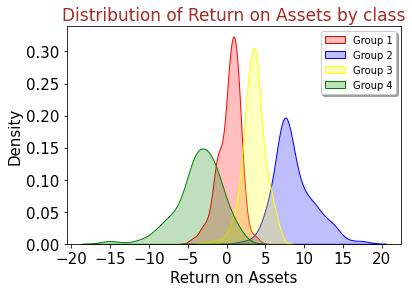

In [148]:
kdeplot_(dataset, 'Return on Assets')

<ipython-input-147-fc2e4235d3ea>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize = 15)
<ipython-input-147-fc2e4235d3ea>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize = 15)


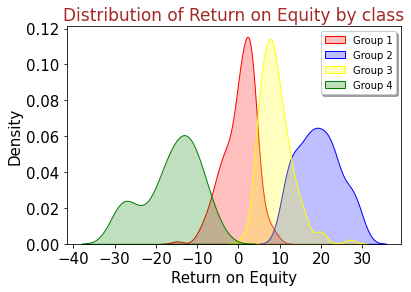

In [149]:
kdeplot_(dataset, 'Return on Equity')

In [170]:
from sklearn import( 
    linear_model, metrics, pipeline, preprocessing, model_selection
)

from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

classifier = KNeighborsClassifier(n_neighbors=3)

from sklearn.model_selection import KFold

In [176]:
from sklearn.model_selection import train_test_split

X = dataset.drop(columns=['Group'])
y = dataset['Group'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [177]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 4)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [178]:
knn.predict(X_test)[0:5]

array(['Group 3', 'Group 3', 'Group 3', 'Group 1', 'Group 1'],
      dtype=object)

In [179]:
knn.score(X_test, y_test)

0.9781021897810219

In [181]:
from sklearn.model_selection import cross_val_score
import numpy as np

#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=4)

#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)

#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.97080292 0.95620438 0.98540146 0.97810219 0.91240876]
cv_scores mean:0.9605839416058395


In [183]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [184]:
knn_gscv.best_params_

{'n_neighbors': 1}

In [185]:
knn_gscv.best_score_

0.981021897810219

# Logistic Regression

<AxesSubplot:>

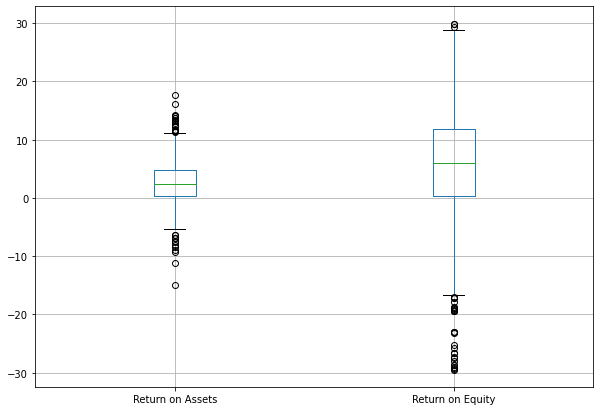

In [186]:
dataset.boxplot(column=['Return on Assets','Return on Equity'], figsize=[10,7])

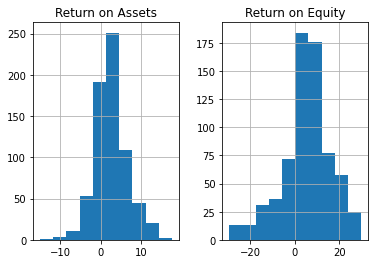

In [187]:
dataset.hist()
plt.show()

c:\users\doudou\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Return on Assets', ylabel='Density'>

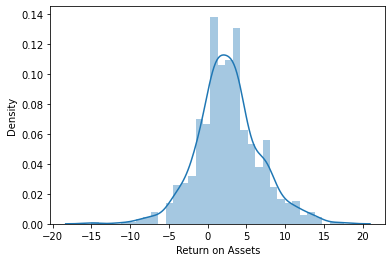

In [188]:
import seaborn as sns
sns.distplot(dataset['Return on Assets'])

c:\users\doudou\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Return on Equity', ylabel='Density'>

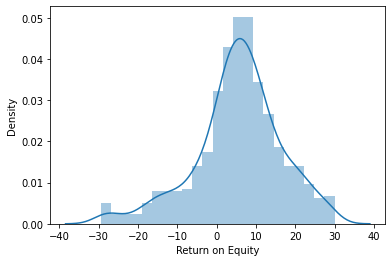

In [189]:
sns.distplot(dataset['Return on Equity'])

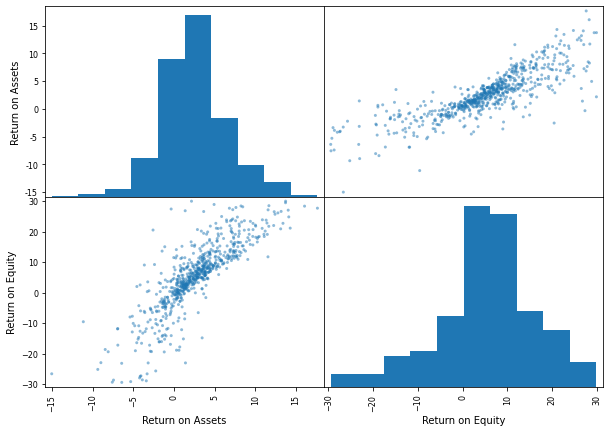

In [191]:
from pandas.plotting import scatter_matrix
# scatter plot matrix
scatter_matrix(dataset, figsize=[10,7])
plt.show()

In [195]:
validation_size = 0.2
seed = 7 #random number
X_train, X_validation, y_train, y_validation = model_selection.train_test_split(X, y, test_size = validation_size, random_state = seed)

In [196]:
X_validation = np.array(X_validation)

X_validation = X_validation.reshape(-1,2)  #reshape(-1,2) >>(-1, n.of features)

X_validation.shape

(137, 2)

In [198]:
from sklearn.linear_model import LogisticRegression
models = [] #an empty list
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))

In [202]:
models
seed = 7
scoring ='accuracy'
results =[]
names = []

for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state = seed, shuffle=True)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        print(name, cv_results.mean(), cv_results.std())

LR 0.9799663299663299 0.02064785818302153
KNN 0.9671717171717171 0.02269932188221518


c:\users\doudou\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\doudou\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [207]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

for name, model in models:
        model.fit(X_train, y_train)
        predictions = model.predict(X_validation)
        print(name)
        print(accuracy_score(y_validation, predictions))
        print(classification_report(y_validation, predictions))

LR
0.9781021897810219
              precision    recall  f1-score   support

     Group 1       0.93      1.00      0.96        39
     Group 2       1.00      1.00      1.00        30
     Group 3       1.00      0.96      0.98        54
     Group 4       1.00      0.93      0.96        14

    accuracy                           0.98       137
   macro avg       0.98      0.97      0.98       137
weighted avg       0.98      0.98      0.98       137

KNN
0.927007299270073
              precision    recall  f1-score   support

     Group 1       0.88      0.97      0.93        39
     Group 2       0.96      0.90      0.93        30
     Group 3       0.93      0.94      0.94        54
     Group 4       1.00      0.79      0.88        14

    accuracy                           0.93       137
   macro avg       0.94      0.90      0.92       137
weighted avg       0.93      0.93      0.93       137

